# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [ ]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [ ]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [ ]:
## load dataset here
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/my data/NMML/icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [ ]:
print(df.dtypes)

emotion     int64
pixels     object
dtype: object


In [ ]:
## parsing data here
images, labels = parse_data(df)


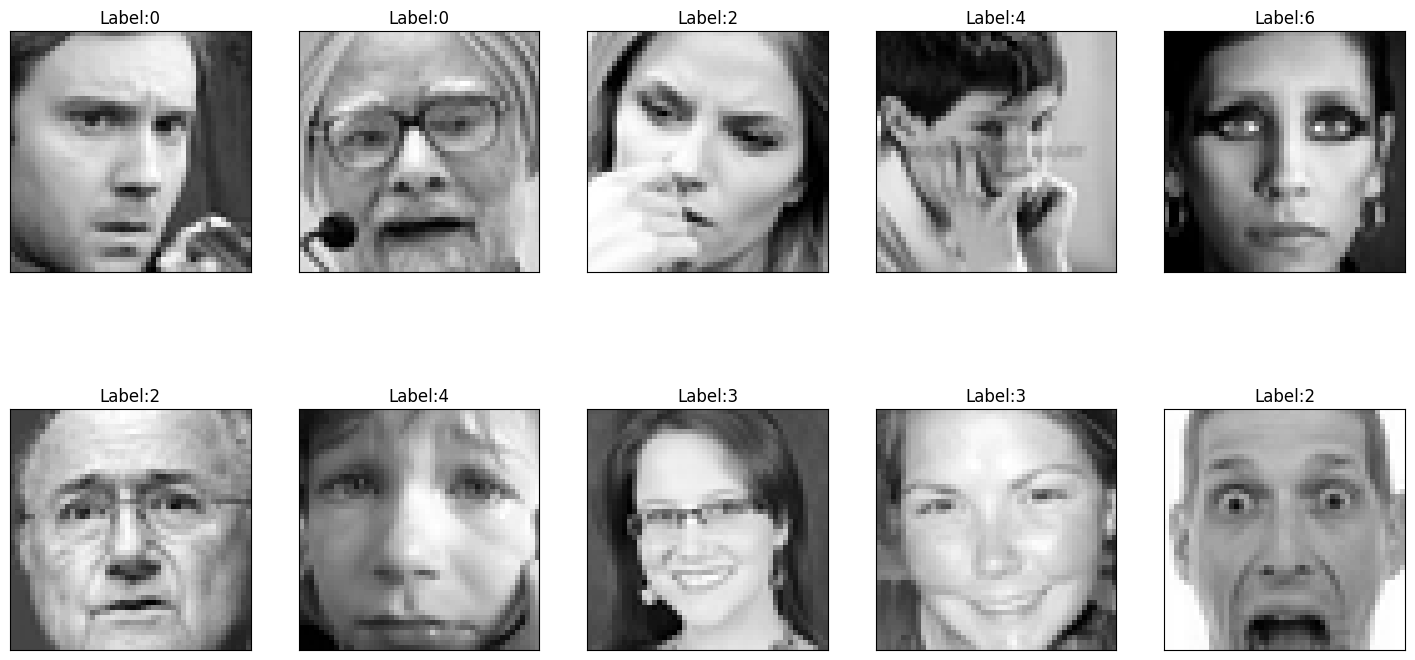

In [ ]:
## showing images here
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [ ]:
images = images.reshape(len(images), 48*48)
print(images.shape)

(35887, 2304)


In [ ]:
# Khởi tạo đối tượng PCA với 2 thành phần chính để trực quan hóa
pca_2d = PCA(n_components=2)
images_pca_2d = pca_2d.fit_transform(images)
images_pca_2d.shape

(35887, 2)

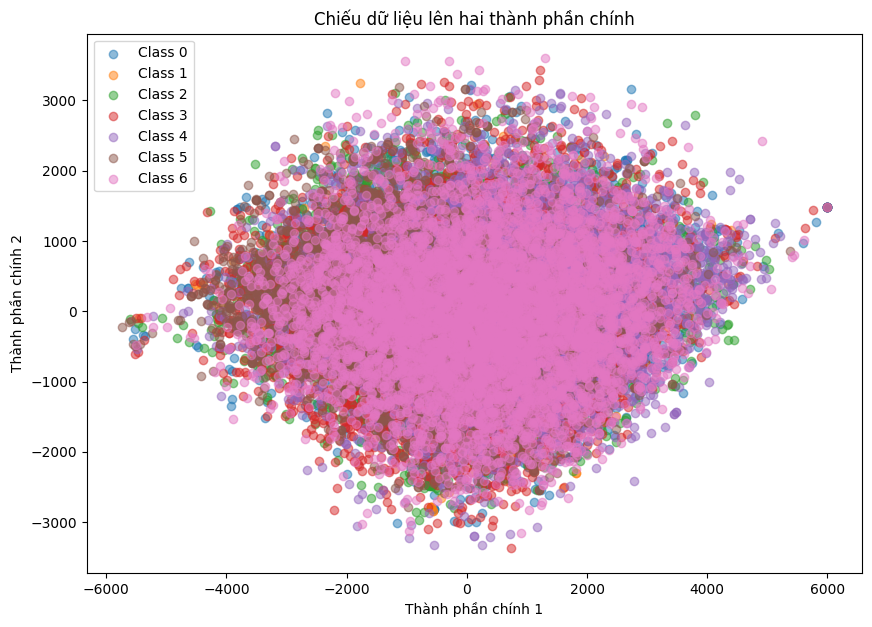

In [ ]:
# Trực quan hóa dữ liệu dựa trên hai thành phần chính
plt.figure(figsize=(10, 7))
for i in range(len(np.unique(labels))):
    subset = images_pca_2d[labels == i]
    plt.scatter(subset[:, 0], subset[:, 1], label=f'Class {i}', alpha=0.5)

plt.xlabel('Thành phần chính 1')
plt.ylabel('Thành phần chính 2')
plt.legend()
plt.title('Chiếu dữ liệu lên hai thành phần chính')
plt.show()

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

In [ ]:
## determine the optimal number of PCs here
## pca.explained_variance_()

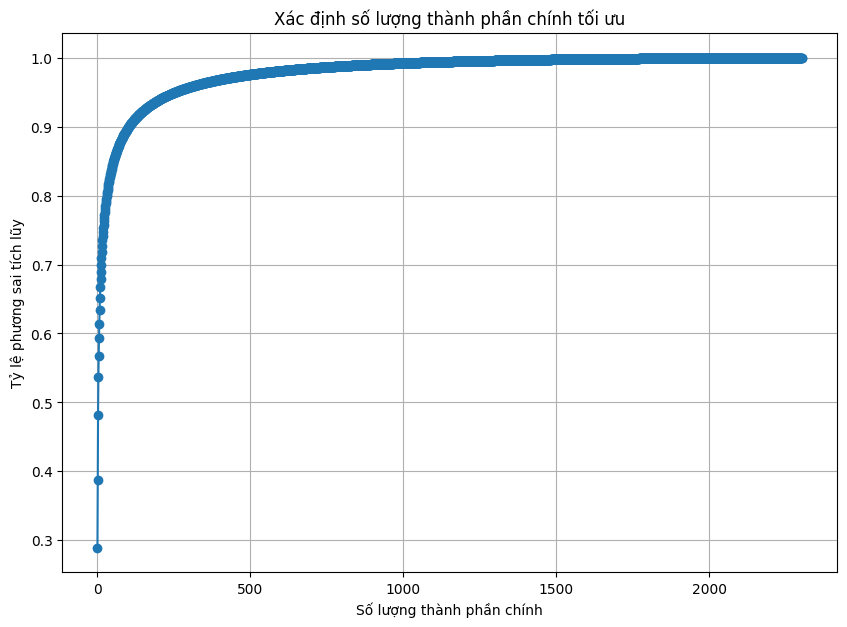

Số lượng thành phần chính tối ưu: 255


In [ ]:
# Khởi tạo đối tượng PCA với số lượng thành phần chính tối đa
pca = PCA()
pca.fit(images)

# Tính tỷ lệ phương sai giải thích được
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Vẽ biểu đồ explained variance ratio để xác định số lượng thành phần chính tối ưu
plt.figure(figsize=(10, 7))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Số lượng thành phần chính')
plt.ylabel('Tỷ lệ phương sai tích lũy')
plt.title('Xác định số lượng thành phần chính tối ưu')
plt.grid(True)
plt.show()

# Xác định số lượng thành phần chính cần thiết để đạt được một tỷ lệ explained variance mong muốn (ví dụ 95%)
optimal_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f'Số lượng thành phần chính tối ưu: {optimal_components}')

Giải thích quá trình lựa chọn
Tạo đối tượng PCA:  tạo một đối tượng PCA và huấn luyện nó trên toàn bộ dữ liệu để tính toán tỷ lệ phương sai giải thích được bởi tất cả các thành phần chính.

Tính tỷ lệ phương sai tích lũy: Sử dụng np.cumsum để tính tỷ lệ phương sai tích lũy từ explained_variance_ratio_.

Vẽ biểu đồ: Biểu đồ này giúp chúng ta hình dung cách tỷ lệ phương sai tích lũy tăng dần theo số lượng thành phần chính. Điểm "uốn" trên biểu đồ thường chỉ ra số lượng thành phần chính tối ưu.

Xác định số lượng thành phần chính tối ưu: Chọn số lượng thành phần chính sao cho tỷ lệ phương sai tích lũy đạt đến một ngưỡng mong muốn, chẳng hạn như 95%. Số lượng thành phần chính này đảm bảo rằng mô hình của chúng ta giữ lại 95% thông tin từ dữ liệu gốc.

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

#Prepare Data

In [ ]:
## splitting data into train/val/test subsets here

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, random_state=10, train_size=0.8)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28709, 2304), (7178, 2304), (28709,), (7178,))

In [ ]:
# images_pca=pca.transform(images) ## modify images' array to the appropriate shape

In [ ]:
pca = PCA(n_components=255)
# Áp dụng PCA lên tập huấn luyện và tập kiểm thử
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
scaler = StandardScaler()
X_normalized_train = scaler.fit_transform(X_train)
X_normalized_test = scaler.transform(X_test)

#Logistic Regression


In [ ]:
model = LogisticRegression(max_iter=100)
model.fit(X_train_pca, y_train)

# Dự đoán trên tập kiểm thử
y_pred = model.predict(X_test_pca)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Dộ chính xác của mô hình: {accuracy:.2f}')

Dộ chính xác của mô hình: 0.37


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model = LogisticRegression(max_iter=100)
model.fit(X_normalized_train, y_train)

# Dự đoán trên tập kiểm thử
y_pred = model.predict(X_normalized_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Dộ chính xác của mô hình: {accuracy:.2f}')

Dộ chính xác của mô hình: 0.36


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
param_grid = [
    {'penalty':['l2','none'],
    'C': [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0],
    'solver': ['lbfgs','newton-cg','sag','saga'],
    'multi_class': ['multinomial', 'ovr']
}
]


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.01], 'multi_class': ['multinomial'],
                          'penalty': ['l2', 'l1'], 'solver': ['lbfgs']}],
             verbose=True)

In [ ]:
grid_search.fit(X_train_pca,y_train)
# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_pca)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Dộ chính xác của mô hình sau khi điều chỉnh: {accuracy:.2f}')

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver 

Best parameters: {'C': 0.01, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
Dộ chính xác của mô hình sau khi điều chỉnh: 0.37


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## SVM


In [ ]:
param_grid = {"C": [0.01, 0.1, 1, 10, 100, 1000],
              "gamma": ["scale", 0.001, 0.005, 0.1]}

# Create a pipeline with StandardScaler and GridSearchCV for SVC
pipeline = make_pipeline(StandardScaler(), GridSearchCV(SVC(), param_grid, cv=10, scoring="f1", verbose=1))

In [ ]:
pipeline.fit(X_train, y_train)


In [ ]:
best_params = pipeline.steps[1][1].best_params_
print("Best parameters found by GridSearchCV:", best_params)

In [ ]:
best_svm_model = SVC(C=best_params['C'], gamma=best_params['gamma'])


In [ ]:
# Fit the SVM model on the training data after PCA
# Assuming you want to use 100 components for PCA (you can adjust this number)
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_normalized_train)
X_test_pca = pca.transform(X_normalized_test)

best_svm_model.fit(X_train_pca, y_train)

In [ ]:
y_pred = best_svm_model.predict(X_test_pca)


In [ ]:
print(f'Accuracy of the SVM model after PCA: {accuracy:.2f}')


##Random Forest

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint


In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, 15],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini']
}


clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)
grid_search.fit(X_train_pca, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100]},
             verbose=2)

In [ ]:
best_params = grid_search.best_params_
print(best_params)

{'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'n_estimators': 100}


In [ ]:
best_clf = grid_search.best_estimator_
best_clf.fit(X_train_pca, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=15, max_features='auto', random_state=42)

In [ ]:
y_pred = best_clf.predict(X_test_pca)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.3879910838673725
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.10      0.17       970
           1       1.00      0.06      0.12       113
           2       0.54      0.17      0.26       986
           3       0.33      0.91      0.49      1802
           4       0.41      0.20      0.26      1251
           5       0.76      0.43      0.55       814
           6       0.39      0.23      0.29      1242

    accuracy                           0.39      7178
   macro avg       0.57      0.30      0.31      7178
weighted avg       0.48      0.39      0.34      7178



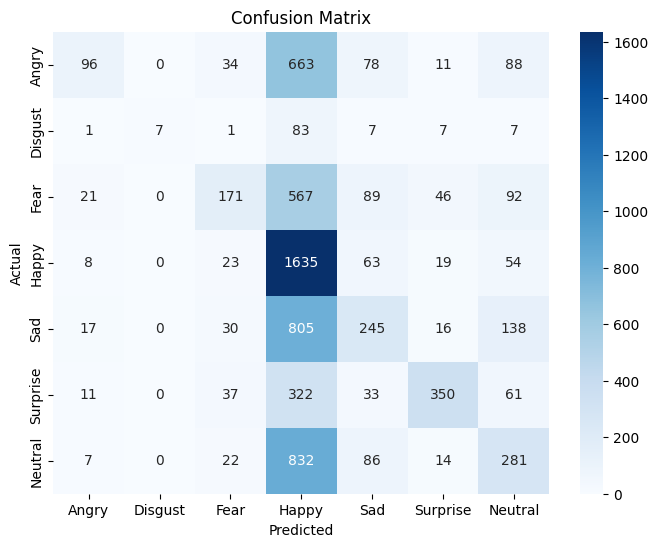

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Đoạn code để tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Định nghĩa các nhãn của lớp (trong trường hợp này là các cảm xúc)
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Vẽ confusion matrix bằng seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [ ]:
## visualize the confusion matrices and classification reports here

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Đánh giá accuracy
accuracy = accuracy_score(y_test, y_pred)

# Đánh giá precision, recall và f1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Trực quan hóa ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Tính toán và hiển thị báo cáo phân loại
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)
